In [51]:
import networkx as nx 
import matplotlib.pyplot as plt 
import numpy as np
from numpy.linalg import matrix_power
from scipy.sparse.csgraph import laplacian
import scipy.linalg as la
import random
import time

In [53]:
def P_ER_Gragh(k,p) :
    G= nx.erdos_renyi_graph(k,p) 
    #nx.draw(G, pos=nx.fruchterman_reingold_layout(G), with_labels=True)
    #plt.show() 
    return(G)

In [131]:
def R_regular_Gragh(k,r) :
    G= nx.random_regular_graph(r,k) 
    #nx.draw(G, pos=nx.fruchterman_reingold_layout(G), with_labels=True)
    #plt.show() 
    return(G)

In [105]:
def irreducibility (graph,k) :
    A = nx.to_numpy_matrix(graph)
    B = np.zeros((k,k))
    for i in range(k):
        B = B + matrix_power(A, i)
    if np.all(B > 0) :
        return(1)
    return(0)


In [67]:
def BFS(graph, k, start_node = 2) :
    level = {start_node : 0}
    parent = {start_node : None}
    i = 0
    frontier = [start_node]
    while frontier:
        next_node = []
        for u in frontier:
            for v in list(graph[u]):
                if v not in level:
                    level[v] = i
                    parent[v] = u
                    next_node.append(v)
        frontier = next_node
        i += 1
    if len((list(level))) == k :
        return(1)
    return(0)

In [46]:
def Laplacian(graph) :
    A = nx.to_numpy_matrix(graph)
    L = laplacian(A)
    eingevalues, eingevectors = la.eig(L)
    sort_values = np.sort(eingevalues)
    if round(sort_values[1],5) > 0 :
        return(1)
    return(0)

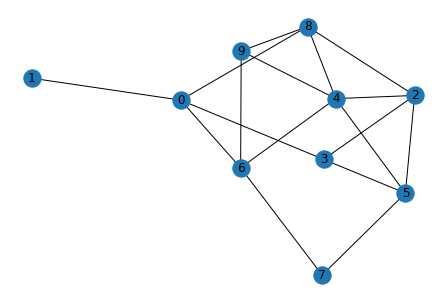

In [31]:
G = P_ER_Gragh(10,.5)

In [26]:
irreducibility (G,10)

'The graph is not connected'

In [20]:
BFS(G, 10, start_node = 2)

The graph is connected


In [47]:
Laplacian(G)

1

## measuring complexity

For measuring the complexity of the 3 functions, we use the average running time of these functions over 1000 samples

In [60]:
def time_irreducibility(sample_number) :
    run_time = dict()
    for k in range(5,160,10):
        print(k)
        start = time.time()
        for i in range(sample_number) :
            p = random.uniform(0,1)
            G = P_ER_Gragh(k,p)
            irreducibility(G,k)
        end = time.time()
        run_time[k] = (end - start) / sample_number
        
    return(run_time)

In [64]:
def time_BFS(sample_number) :
    run_time = dict()
    for k in range(5,160,10):
        print(k)
        start = time.time()
        for i in range(sample_number) :
            p = random.uniform(0,1)
            G = P_ER_Gragh(k,p)
            BFS(G, k, start_node = 2)
        end = time.time()
        run_time[k] = (end - start) / sample_number
        
    return(run_time)

In [65]:
def time_Laplacian(sample_number) :
    run_time = dict()
    for k in range(5,160,10):
        print(k)
        start = time.time()
        for i in range(sample_number) :
            p = random.uniform(0,1)
            G = P_ER_Gragh(k,p)
            Laplacian(G)
        end = time.time()
        run_time[k] = (end - start) / sample_number
        
    return(run_time)

In [62]:
irreducibility_time = time_irreducibility(100)

5
15
25
35
45
55
65
75
85
95
105
115
125
135
145
155


C:\Users\Nino\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in add
  """


In [68]:
BFS_time = time_BFS(100)

5
15
25
35
45
55
65
75
85
95
105
115
125
135
145
155


In [69]:
Laplacian_time = time_Laplacian(100)

5
15
25
35
45
55
65
75
85
95
105
115
125
135
145
155


In [142]:
def make_plot(dict, title,var, y_label) :
    lists = sorted(dict.items())
    x, y = zip(*lists)
    plt.plot(x, y, 'ro', x , y , 'k')
    plt.xlabel(var)
    plt.ylabel(y_label)
    plt.title(title)
    plt.savefig( title + '.png', bbox_inches='tight')
    plt.show()
    
    

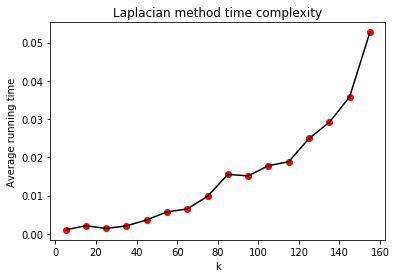

In [143]:
make_plot(Laplacian_time, 'Laplacian method time complexity','k', 'Average running time')

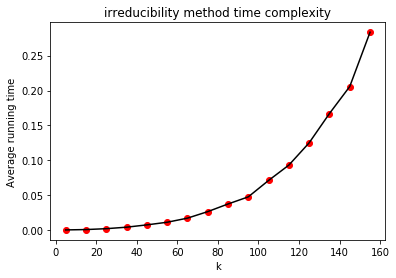

In [144]:
make_plot(irreducibility_time, 'irreducibility method time complexity','k','Average running time')

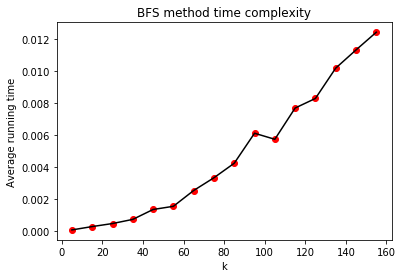

In [145]:
make_plot(BFS_time, 'BFS method time complexity', 'k', 'Average running time')

## connectivity

In [120]:
def ER_conncetivity (sample_number):
    prob = dict()
    k =100
    for p in np.arange(0, 1, 0.05).tolist() :
        count = 0
        for i in range(sample_number) :
            G = P_ER_Gragh(k,p)
            count += BFS(G, k, start_node = 2)
        prob[p] = count/sample_number
    return(prob)

In [121]:
ER_conncetivity (1000)   #check connectivity for k=10, It makes sense

{0.0: 0.0,
 0.05: 0.519,
 0.1: 0.997,
 0.15000000000000002: 1.0,
 0.2: 1.0,
 0.25: 1.0,
 0.30000000000000004: 1.0,
 0.35000000000000003: 1.0,
 0.4: 1.0,
 0.45: 1.0,
 0.5: 1.0,
 0.55: 1.0,
 0.6000000000000001: 1.0,
 0.65: 1.0,
 0.7000000000000001: 1.0,
 0.75: 1.0,
 0.8: 1.0,
 0.8500000000000001: 1.0,
 0.9: 1.0,
 0.9500000000000001: 1.0}

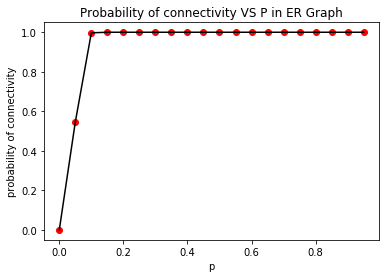

In [146]:
make_plot(ER_conncetivity(1000), 'Probability of connectivity VS P in ER Graph', 'p', 'probability of connectivity')

In [128]:
def R_regular_connectivity (sample_number,R):
    prob = dict()
    r = R
    
    for k in range(10, 100, 8) :
        count = 0
        for i in range(sample_number) :
            G = R_regular_Gragh(k,r)
            count += BFS(G, k, start_node = 2)
        prob[k] = count/sample_number
    return(prob)

In [139]:
def make_Dual_plot(dict1,dict2, title,var) :
    lists1 = sorted(dict1.items())
    lists2 = sorted(dict2.items())
    x, y = zip(*lists1)
    s, w = zip(*lists2)
    plt.plot(x, y, 'ro', x , y , 'k')
    plt.plot(s, w, 'bo', s , w , 'k')
    plt.xlabel(var)
    plt.ylabel('probability of connectivity')
    plt.title(title)
    plt.text(90, 0.9, 'r=8')
    plt.text(90, 0.2, 'r=2')
    plt.savefig( title + '.png', bbox_inches='tight')
    plt.show()

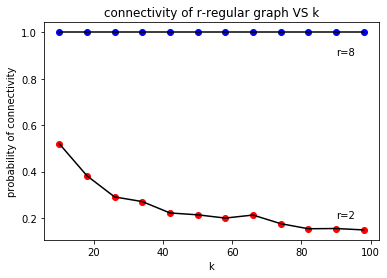

In [141]:
make_Dual_plot(R_regular_connectivity (1000,2),R_regular_connectivity (1000,8), 'connectivity of r-regular graph VS k','k')